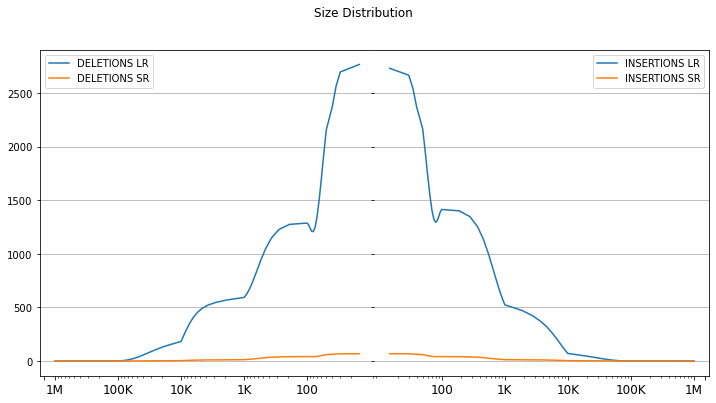

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d

data_new = pd.read_csv('../data/reports/details/DBA_2J-mapped_200_2_20_all.csv', names=['Chr','Type','Size'], header=None).sort_values(by=['Size'])
data_old = pd.read_csv('../data/reports/details/C57BL_6NJ-mapped_200_2_20_all.csv', names=['Chr','Type','Size'], header=None).sort_values(by=['Size'])

size_bps = [50,100,1000,10000,100000,1000000]

all_boxes = [15,30,35,40]
for idx, val in enumerate(size_bps):
    if idx==0:
        continue
    else:
        all_boxes.extend(np.linspace(size_bps[idx-1], val, num=10, endpoint=False, dtype = int))
all_boxes.append(1000000)
all_boxes.append(2000000)

data_new['SizeBin'] = pd.cut(x=data_new['Size'], bins=all_boxes)
grouped_new=data_new.groupby(["SizeBin","Type"])["SizeBin"].count().unstack("Type").fillna(0)

data_old['SizeBin'] = pd.cut(x=data_old['Size'], bins=all_boxes)
grouped_old=data_old.groupby(["SizeBin","Type"])["SizeBin"].count().unstack("Type").fillna(0)

x=[]
for interval in grouped_new['DEL'].index.array:
    x.append(interval.left)

deletions_new=np.array(grouped_new['DEL'].values)
insertions_new=np.array(grouped_new['INS'].values)

deletions_old=np.array(grouped_old['DEL'].values)
insertions_old=np.array(grouped_old['INS'].values)

positions = [100,1000,10000,100000,1000000, 1500000]
labels = ["100", "1K", "10K", "100K", "1M", ""]

y1 = gaussian_filter1d(deletions_new, sigma=4)
y2 = gaussian_filter1d(insertions_new, sigma=4)

y3 = gaussian_filter1d(deletions_old, sigma=4)
y4 = gaussian_filter1d(insertions_old, sigma=4)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12,6))

ax1.set_xscale('log')
ax1.plot(x, y1, label = "DELETIONS LR")
ax1.plot(x, y3, label = "DELETIONS SR")
ax1.set_xticks(positions)
ax1.set_xticklabels(labels, fontsize=12)
right_side = ax1.spines["right"]
right_side.set_visible(False)
ax1.invert_xaxis()
ax1.legend()

ax2.set_xscale('log')
ax2.plot(x, y2, label = "INSERTIONS LR")
ax2.plot(x, y3, label = "INSERTIONS SR")
ax2.set_xticks(positions)
ax2.set_xticklabels(labels, fontsize=12)

left_side = ax2.spines["left"]
left_side.set_visible(False)
ax2.legend()

ax1.yaxis.grid()
ax2.yaxis.grid()

plt.subplots_adjust(wspace=0, hspace=0)
fig.suptitle("Size Distribution")
plt.show()